<h1>ECE 445: Machine Learning for Engineers - Albert Tran</h1>
<h2>Mini Jupyter Exercise #4</h2>
<h3>k-Nearest Neighbor Classification</h3>
<br>
<strong>Objective:</strong> In this exercise, we will engage in classification of images of handwritten digits ‘0’ and ‘1’ using
k-nearest neighbor (k-NN) classification.
<br>
<h4>Training Data</h4>
The training dataset for this problem corresponds to the images of handwritten digits ‘0’ and ‘1’ that come
prepackaged with the sklearn package. There are a total of 360 images of digits ‘0’ and ‘1’; we will divide
them into 300 images for training purposes, while we will evaluate the performance of k-NN classification
on the remaining 60 images, which we will refer to as the “test” set.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y = True)

m = 64 #Dimensionality of data samples
n = 300 #n = Number of training samples
test_n = 360 - n #Number of testing samples

# Labeled training set
training_images = images[:n]
training_labels = labels[:n]

# Labeled test set
test_images = images[n:]
test_labels = labels[n:]

num_of_classes = 2 #Number of Classes = 2

<h4>k-NN Classification Using 2-D Features</h4>
<br>
Principal Component Analysis (PCA) of images in the training set and computation two-dimensional PCA features of training images

In [2]:
#Define PCA Function
def pca(data, num_of_prin_comp):
    num_of_data = len(data)
    dim_of_data = len(data[0])
    transposed_data = np.transpose(data) #Changes dataset so that data samples are column vectors
    mean = transposed_data.mean(1)  #Mean Vector
    centered_data = np.zeros((dim_of_data,num_of_data))

    for i in range(num_of_data):
        centered_data[:,i] = transposed_data[:,i] - mean  #Centering Data

    svd_u, svd_sigma, svd_v = np.linalg.svd(centered_data, full_matrices = True)  # SVD

    u = np.zeros((dim_of_data,num_of_prin_comp))
    s = np.zeros((num_of_prin_comp,num_of_prin_comp))

    for i in range(dim_of_data):
        for j in range(num_of_prin_comp):
            u[i,j] = svd_u[i,j] #First r singular vectors of U
    for i in range(num_of_prin_comp):
        s[i,i] = svd_sigma[i] #Largest r singular values
    
    w = np.matrix(u)*np.matrix(s) #Principal Component Matrix with Principal Axes as Columns
    for i in range(num_of_prin_comp):
        w[:,i] = w[:,i]/np.linalg.norm(w[:,i]) #Normalizing Each Principal Component


    transformed_data = np.transpose(np.transpose(w)*centered_data) #Feature Vectors
    return transformed_data

#Define k-NN Function
def kNN(testData, trainingData, trainingLabels, numOfClasses, numberOfNeighbors):
    #Each is data sample is taken as a row vector
    
    #Array with each test data's k nearest neighbors's distance and index
    #nn[testDataIndex, neighborIndex, neighborInfomationIndex]
    #neighborInformationIndex is 0 for distance to test sample and 1 for index in the training dataset
    nn = np.zeros((len(testData), numberOfNeighbors, 2))
    
    
    for i in range(len(testData)):
        distance = -1.0 #Used to keep track of the max distance out of all neighbor candidates
        count = 0 #Used to fill the neighbor array with members before comparing to rest of training data
        
        for j in range(len(trainingData)):
            two_norm = np.linalg.norm(testData[i]-trainingData[j]) #Distance from test sample to training sample            
            #Filling up array with first k training data samples before finding k nearest neighbors
            if count < numberOfNeighbors:
                nn[i,count,0] = two_norm
                nn[i,count,1] = j
                count += 1
                distance = np.max(nn[i,:,0])
                continue                
            #Replacing when found closer training data
            if two_norm < distance:
                max_index = np.where(nn[i,:,0]==np.max(nn[i,:,0]))[0][0]
                nn[i,max_index,0] = two_norm
                nn[i,max_index,1] = j
                distance = np.max(nn[i,:,0])
                
    #Creating classified label array that classifies each test sample by 
    #the class that is most prevalent in the neighbors
    classified_labels = np.zeros((len(testData)))
    for i in range(len(testData)):
        neighbors = np.zeros((numOfClasses))
        for j in range(numberOfNeighbors):
            neighbors_class = trainingLabels[int(nn[i,j,1])]
            neighbors[neighbors_class] += 1
        classified_labels[i] = int(np.where(neighbors == np.max(neighbors))[0][0])
    return classified_labels

[]

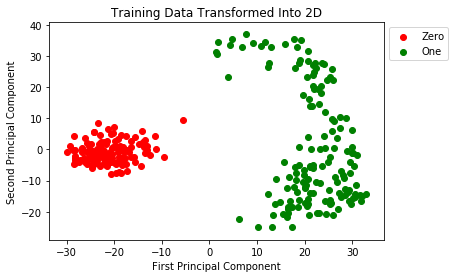

In [3]:
#Performing PCA on the training image set with 2 principal components

transformed_training_data = pca(training_images, 2) #Feature Vectors


#Plotting training data in 2D (Red = 0, Green = 1)
for i in range(n):
    if training_labels[i]==0:
        zero = plt.scatter(transformed_training_data[i,0], transformed_training_data[i,1], color = "red")
    else:
        one = plt.scatter(transformed_training_data[i,0], transformed_training_data[i,1], color = "green")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend((zero, one), ("Zero", "One"), bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title("Training Data Transformed Into 2D")
plt.plot()

Classification of each image in the test set by first transforming it to the two-dimensional PCA domain using the
principal components obtained above and then using k-NN classification with k = 5 and the distance
metric being $\left \| \cdot  \right \|_2$.

[]

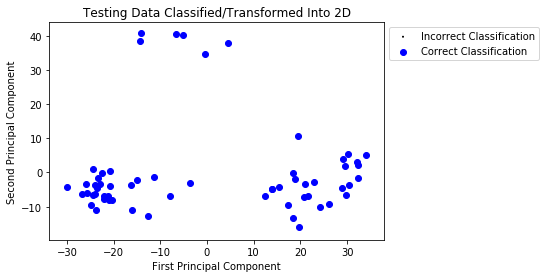

In [4]:
#Transforming Test Set into 2D
transformed_test_data = pca(test_images, 2) #Feature Vectors

nn = np.zeros((test_n, 5, 2))
#Classifying Test Set with 5-Nearest Neighbors
classified_test_labels = kNN(transformed_test_data, transformed_training_data, training_labels, num_of_classes, 5)

#Plotting Classified Test Data (Blue = Correct Classification, Black = Incorrect Classification)
incorrect = plt.scatter(np.NaN, np.NaN, color="black") #Declaration so that it shows in legend if no data
correct = plt.scatter(np.NaN, np.NaN, color="blue")
for i in range(test_n):
    if classified_test_labels[i] == test_labels[i]:
        correct = plt.scatter(transformed_test_data[i,0], transformed_test_data[i,1], color="blue")
    else:
        incorrect = plt.scatter(transformed_test_data[i,0], transformed_test_data[i,1], color="black")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend((incorrect, correct), ("Incorrect Classification", "Correct Classification"), bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title("Testing Data Classified/Transformed Into 2D")
plt.plot()

Two Plots Overlayed:

[]

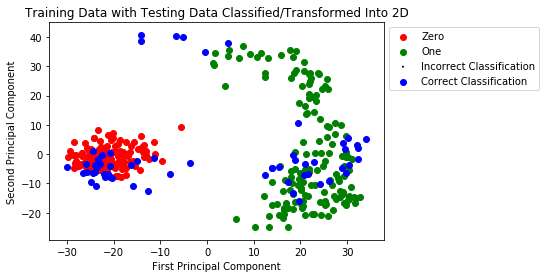

In [5]:
idk = 0
for i in range(n):
    if training_labels[i]==0:
        zero = plt.scatter(transformed_training_data[i,0], transformed_training_data[i,1], color = "red")
    else:
        one = plt.scatter(transformed_training_data[i,0], transformed_training_data[i,1], color = "green")
for i in range(test_n):
    if classified_test_labels[i] == test_labels[i]:
        correct = plt.scatter(transformed_test_data[i,0], transformed_test_data[i,1], color="blue")
    else:
        incorrect = plt.scatter(transformed_test_data[i,0], transformed_test_data[i,1], color="black")
        
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend((zero, one, incorrect, correct), ("Zero", "One", "Incorrect Classification", "Correct Classification"), bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title("Training Data with Testing Data Classified/Transformed Into 2D")
plt.plot()

Computation of the average classification error for the test set, defined as $\frac{1}{N}\sum_{i=1}^{N}1_{\left \{ \widehat{y_i}\neq y_i \right \}}$; here,
$y_i$ denotes the true label of the i-th image, $\widehat{y_i}$ denotes the label returned by k-NN, and N = 60 in this
particular problem.

In [6]:
#Error of Classification
loss = 0.0
for i in range(test_n):
    if classified_test_labels[i] != test_labels[i]:
        loss += 1
print("Average Classification Error:", loss/test_n)

Average Classification Error: 0.0


<h4>k-NN Classification Using Higher-dimensional Features</h4>
<br>
PCA of images in the training set and compute r-dimensional PCA features of training
images such that the top-r principal components capture 95% of variation within the training data
<br>
$\frac{\sum_{i=1}^{k} \sigma^2_i}{\left \| \overline{X} \right \|^2_F}\geq .95$

In [7]:
#Finding the smallest number of principal components for .95 Representation of Original Data:
training_images_centered = np.zeros((m,n))
for i in range(n):
    #Centering Training Data
    training_images_centered[:,i] = np.transpose(training_images)[:,i] - np.transpose(training_images).mean(1)
training_data_norm_squared = np.square(np.linalg.norm(training_images_centered))
svd_u, svd_sigma, svd_v = np.linalg.svd(training_images_centered, full_matrices = True)  # SVD

r = 0 #Top r principal components

for i in range(len(svd_sigma)):
    sum = 0
    representation = 0;
    for j in range(i+1):
        sum += np.square(svd_sigma[j])
    representation = sum/training_data_norm_squared
    if representation >= .95:
        r = i+1
        print("95% of the Original Data is represented by the top", r, "principal components")
        break

95% of the Original Data is represented by the top 19 principal components


19-Dimensional PCA on Training Image Set

In [8]:
#Performing PCA on the training image set with r principal components
transformed_train_r = pca(training_images, r) #Feature Vectors

Classification of each image in the test set by first transforming it to the r-dimensional PCA domain using the
principal components obtained above and then using k-NN classification with the distance metric being
$\left \| \cdot  \right \|_2$ and k being an odd integer from 1 to 9.

In [9]:
#Transforming Test Set into r-D
transformed_test_r = pca(test_images, r) #Feature Vectors

Average Classification Error, k = 1 : 0.0
Average Classification Error, k = 3 : 0.0
Average Classification Error, k = 5 : 0.0
Average Classification Error, k = 7 : 0.0
Average Classification Error, k = 9 : 0.0


[]

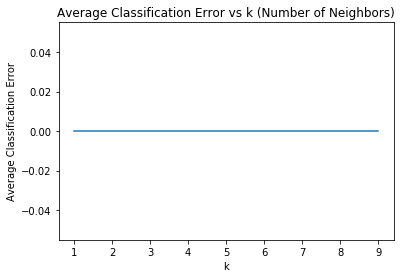

In [10]:
#Classifying Test Set with k-Nearest Neighbors (k=1,3,5,7,9)

error = np.zeros((5)) #List that contains the average classification error for each k used

for k in range(1,10,2):
    classified_test_labels = kNN(transformed_test_r, transformed_train_r, training_labels, num_of_classes, k)

    #Error of Classification
    loss = 0.0
    for i in range(test_n):
        if classified_test_labels[i] != test_labels[i]:
            loss += 1
    error[int((k-1)/2)] = loss/test_n
    print("Average Classification Error, k =",k,":", loss/test_n)
    
plt.plot([1,3,5,7,9], error)
plt.xlabel("k")
plt.ylabel("Average Classification Error")
plt.title("Average Classification Error vs k (Number of Neighbors)")
plt.plot()

In this case, it does not matter what k is used. This might be because the number of principal components is high or that the training data in this case was enough to correctly classify the test data.